# Option 2: Prediction 
Complexity: Beginner
User Story: User should be able to provide a Customer ID and Date, and program should be able to predict quantity.
Hint: Data pre-processing, pivoting

In [1]:
# Importing all required libraries...

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading of the dataset...

df = pd.read_excel('Online Retail.xlsx')

In [3]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


# 1. Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.shape

(541909, 8)

In [6]:
Country_Details = df['Country'].value_counts()
Country_Details

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [7]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

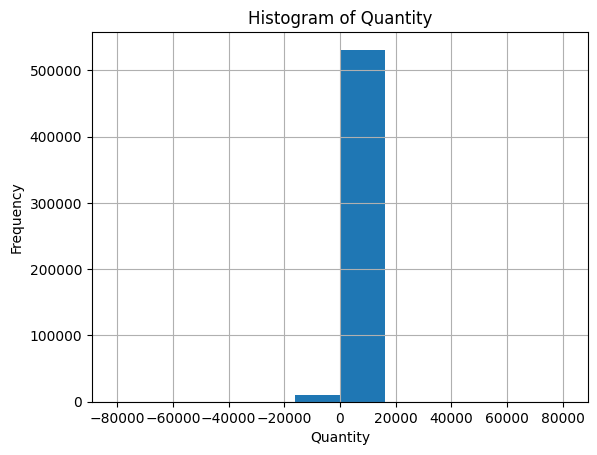

In [9]:
df['Quantity'].hist()

plt.title('Histogram of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [10]:
# From Histogram, It depicted that by mistake some quantities are representd as negative valued...

print(" Count of Negative valued quantity : ",len(df[df['Quantity']<0]))

 Count of Negative valued quantity :  10624


# Handling negative valued Quantity :

- Convert negative values to positive
- Remove negative values

In [11]:
# Convert negative values to positive

df['Quantity'] = df['Quantity'].abs()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [13]:
print("Count of negative value present in quantity column is : ",len(df[df['Quantity']<0]))

Count of negative value present in quantity column is :  0


In [14]:
# Checking of missing values..

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# Handling Missing values

1. Dropping missing values
2. Filling missing values with a constant value
3. Filling missing values with the mean or median or mode

Here we have missing values present in 'Description' and 'CustomerID' column. 
we can't apply any constant values in replace of missing values.
Here we can not apply mean or meadian or mode on 'CustomerID' as it is having unique values.

In [15]:
# Dropping missing values

df_data = df.dropna()
df_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [16]:
# Removing unnecessary columns...

df_data.iloc[:,[3,4,5]]

,Quantity,InvoiceDate,UnitPrice
0,6,2010-12-01 08:26:00,2.55
1,6,2010-12-01 08:26:00,3.39
2,8,2010-12-01 08:26:00,2.75
3,6,2010-12-01 08:26:00,3.39
4,6,2010-12-01 08:26:00,3.39
...,...,...,...
541904,12,2011-12-09 12:50:00,0.85
541905,6,2011-12-09 12:50:00,2.10
541906,4,2011-12-09 12:50:00,4.15
541907,4,2011-12-09 12:50:00,4.15


In [17]:
# Grouping by CustomerID & InvoiceDate and find sum of quantity per customer..

grouped = df_data.groupby(['CustomerID', 'InvoiceDate'])
aggregated = grouped['Quantity'].agg('sum')
aggregated = aggregated.reset_index()
aggregated

,CustomerID,InvoiceDate,Quantity
0,12346.0,2011-01-18 10:01:00,74215
1,12346.0,2011-01-18 10:17:00,74215
2,12347.0,2010-12-07 14:57:00,319
3,12347.0,2011-01-26 14:30:00,315
4,12347.0,2011-04-07 10:43:00,483
...,...,...,...
22029,18283.0,2011-11-30 12:59:00,134
22030,18283.0,2011-12-06 12:02:00,142
22031,18287.0,2011-05-22 10:39:00,488
22032,18287.0,2011-10-12 10:23:00,990


In [18]:
# Formatting of InvoiceDate column to fit into model...

aggregated['InvoiceDate'] = pd.to_datetime(aggregated['InvoiceDate'])
aggregated['year'] = aggregated['InvoiceDate'].dt.year
aggregated['month'] = aggregated['InvoiceDate'].dt.month
aggregated['day'] = aggregated['InvoiceDate'].dt.day
aggregated

,CustomerID,InvoiceDate,Quantity,year,month,day
0,12346.0,2011-01-18 10:01:00,74215,2011,1,18
1,12346.0,2011-01-18 10:17:00,74215,2011,1,18
2,12347.0,2010-12-07 14:57:00,319,2010,12,7
3,12347.0,2011-01-26 14:30:00,315,2011,1,26
4,12347.0,2011-04-07 10:43:00,483,2011,4,7
...,...,...,...,...,...,...
22029,18283.0,2011-11-30 12:59:00,134,2011,11,30
22030,18283.0,2011-12-06 12:02:00,142,2011,12,6
22031,18287.0,2011-05-22 10:39:00,488,2011,5,22
22032,18287.0,2011-10-12 10:23:00,990,2011,10,12


# Modeling 

In [21]:
# Define feature and target variable

X = aggregated.iloc[:,[0,2,3,4,5]]
y = aggregated.iloc[:,2]

In [22]:
# Apply Decision tree classifier

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')

In [23]:
# Take 20% of data for testing and remaining for training the ML model
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [24]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [25]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [26]:
train_accuracy = model.score(X_train,y_train)
print("Accuracy of the model on train data = ",train_accuracy)

# Getting the accuracy on test data
test_accuracy = model.score(X_test,y_test)
print("Accuracy of the model on test data = ",test_accuracy)

Accuracy of the model on train data =  1.0
Accuracy of the model on test data =  0.9639210347174949
